# 1. Trajectory preprocessing

## 1.1 Message decoding and encoding

In [154]:
from pyais import decode
# Decode a single part using decode
decoded = decode(b"!AIVDM,1,1,,B,15NG6V0P01G?cFhE`R2IU?wn28R>,0*05") #exemple of an AIS sentence
print(decoded) #Decode a single part AIS message using decode()

MessageType1(msg_type=1, repeat=0, mmsi=367380120, status=<NavigationStatus.UnderWayUsingEngine: 0>, turn=<TurnRate.NO_TI_DEFAULT: -128.0>, speed=0.1, accuracy=False, lon=-122.404333, lat=37.806948, course=245.2, heading=511, second=59, maneuver=<ManeuverIndicator.NotAvailable: 0>, spare_1=b'\x00', raim=True, radio=34958)


In [155]:
parts = [
    b"!AIVDM,2,1,4,A,55O0W7`00001L@gCWGA2uItLth@DqtL5@F22220j1h742t0Ht0000000,0*08",
    b"!AIVDM,2,2,4,A,000000000000000,2*20",
]
# Decode a multipart message using decode
decoded = decode(*parts)
print(decoded) #The decode() functions accepts a list of arguments: One argument for every part of a multipart message

MessageType5(msg_type=5, repeat=0, mmsi=368060190, ais_version=2, imo=0, callsign='WDK4954', shipname='P/V_GOLDEN_GATE', ship_type=<ShipType.PilotVessel: 50>, to_bow=14, to_stern=7, to_port=4, to_starboard=2, epfd=<EpfdType.Internal_GNSS: 15>, month=0, day=0, hour=24, minute=60, draught=0.0, destination='', dte=False, spare_1=b'\x00')


In [157]:
# Decode to dict
decoded = decode(b"!AIVDM,1,1,,B,15NG6V0P01G?cFhE`R2IU?wn28R>,0*05")
as_dict = decoded.asdict()
print(as_dict)

{'msg_type': 1, 'repeat': 0, 'mmsi': 367380120, 'status': <NavigationStatus.UnderWayUsingEngine: 0>, 'turn': <TurnRate.NO_TI_DEFAULT: -128.0>, 'speed': 0.1, 'accuracy': False, 'lon': -122.404333, 'lat': 37.806948, 'course': 245.2, 'heading': 511, 'second': 59, 'maneuver': <ManeuverIndicator.NotAvailable: 0>, 'spare_1': b'\x00', 'raim': True, 'radio': 34958}


In [179]:
#encode dict
from pyais.encode import encode_dict
from pyais.messages import MessageType1
data = {
    'course': 219.3,
    'lat': 37.802,
    'lon': -122.341,
    'mmsi': '366053209',
    'type': 1
}
encoded = encode_dict(data)
print(encoded)

['!AIVDO,1,1,,A,15M67F@P00G?ur@E`FL8T@000000,0*06']


In [180]:
from pyais.encode import encode_msg
from pyais.messages import MessageType1
msg = MessageType1.create(course=219.3, lat=37.802, lon=-122.341, mmsi='366053209')
encoded = encode_msg(msg)
print(encoded)

['!AIVDO,1,1,,A,15M67F@P00G?ur@E`FL8T@000000,0*06']


## 1.2 Trajectory cleaning 

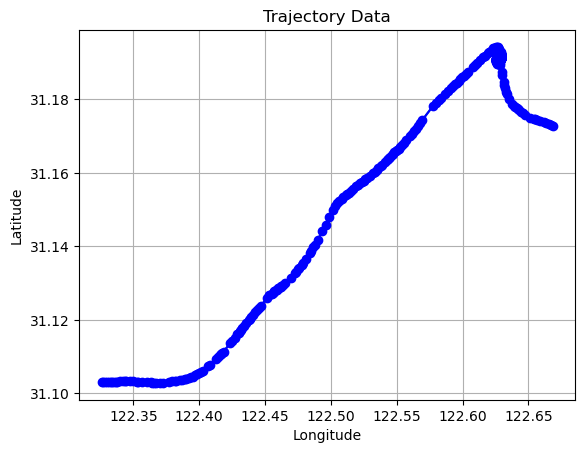

In [1]:
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv('1.csv')
df.head()
# Extract the latitude and longitude data
latitude = df['DRLATITUDE']
longitude = df['DRLONGITUDE']

# Plot the trajectory data
plt.plot(longitude, latitude)

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Trajectory Data')
plt.plot(longitude, latitude, marker='o', color='b', linestyle='-', label='Trajectory')
# Show the plot
plt.grid()
plt.show()

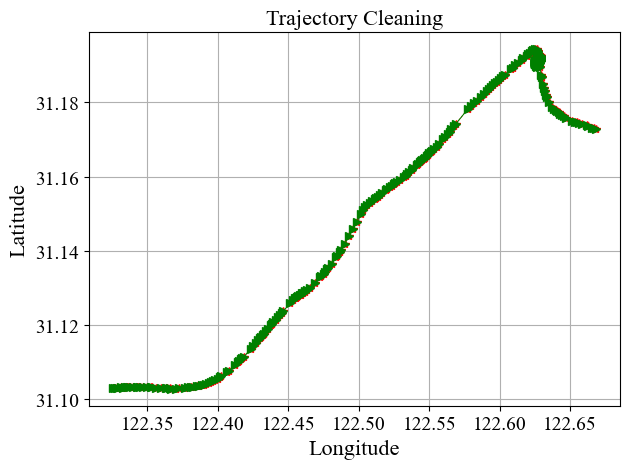

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import traj_clean
def plot(rawdf, cleandf, rl):
    fig, ax = plt.subplots()
    for shipmmsi, dt in rawdf.groupby('DRMMSI'):
        if len(dt) >= rl and len(str(shipmmsi)) > 5:
            dt.sort_values(by='DRGPSTIME', ascending=True, inplace=True)
            ax.plot(dt.loc[:, 'DRLONGITUDE'].values, dt.loc[:, 'DRLATITUDE'].values, marker='*', linestyle='--',
                    color='red',
                    linewidth=0.5)
    for shipmmsi, dt in cleandf.groupby('DRMMSI'):
        if len(dt) >= rl and len(str(shipmmsi)) > 5:
            dt.sort_values(by='DRGPSTIME', ascending=True, inplace=True)
            ax.plot(dt.loc[:, 'DRLONGITUDE'].values, dt.loc[:, 'DRLATITUDE'].values, marker='>', color='green',
                    linewidth=0.75)
    plt.yticks(fontproperties='Times New Roman', size=14)
    plt.xticks(fontproperties='Times New Roman', size=14)
    plt.xlabel('Longitude', fontdict={'family': 'Times New Roman', 'size': 16})
    plt.ylabel('Latitude', fontdict={'family': 'Times New Roman', 'size': 16})
    plt.title('Trajectory Cleaning', fontdict={'family': 'Times New Roman', 'size': 16})
    plt.ticklabel_format(useOffset=False, style='plain')
    plt.grid()
    plt.tight_layout()
    plt.show(block=True)

df = pd.read_csv('1.csv')
if __name__ == '__main__':
    cleandf = traj_clean.heuristic_clean(df,25)
    plot(df,cleandf,1)

In [159]:
# df is the dataframe of vessel trajectories, the sw is the size of sliding window
#How to use “sw_clean” is as follows:
cleandf = traj_clean. sw_clean (df, sw=5)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


##  1.3 Trajectory interpolation

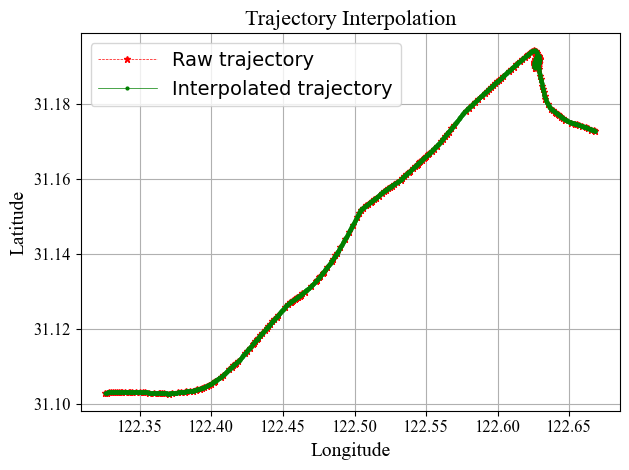

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import traj_interpolation



traj_file = '1.csv'
res = 30
num = None
gpx_data = traj_interpolation.traj_load(traj_file)
traj_data_interp = traj_interpolation.traj_interpolate(traj_file, res, num)

plt.plot(gpx_data['lon'], gpx_data['lat'], marker='*', ms=5, linestyle='--', color='red', linewidth=0.5,
             label='Raw trajectory')
plt.plot(traj_data_interp['lon'], traj_data_interp['lat'], marker='o', ms=2, linestyle='-', color='g',
             linewidth=0.5, label='Interpolated trajectory')
plt.yticks(fontproperties='Times New Roman', size=12)
plt.xticks(fontproperties='Times New Roman', size=12)
plt.xlabel('Longitude', fontdict={'family': 'Times New Roman', 'size': 14})
plt.ylabel('Latitude', fontdict={'family': 'Times New Roman', 'size': 14})
plt.title('Trajectory Interpolation', fontdict={'family': 'Times New Roman', 'size': 16})
plt.ticklabel_format(useOffset=False, style='plain')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


## 1.4 Trajectory segmentation

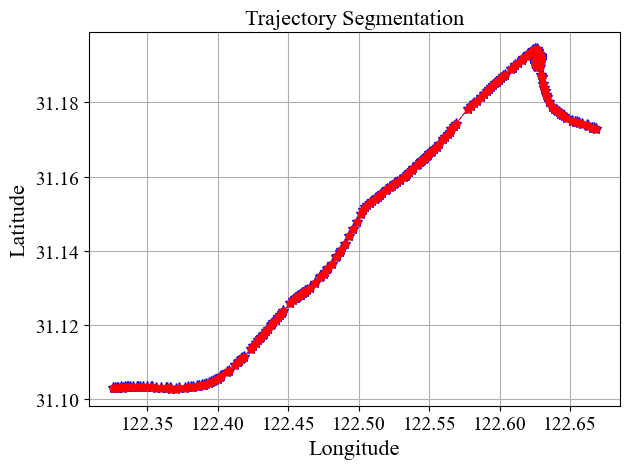

In [161]:
import traj_segment

trajdata = pd.read_csv('1.csv', encoding="gbk",
                           usecols=['DRMMSI', 'DRGPSTIME', 'DRLONGITUDE', 'DRLATITUDE'])
scattercolors = ['blue', 'red', 'yellow', 'cyan', 'purple', 'orange', 'olive', 'brown', 'black', 'm']
rawgrouped = trajdata[:].groupby('DRMMSI')
for name, group in rawgrouped:
    plt.plot(group['DRLONGITUDE'], group['DRLATITUDE'], marker='*', ms=8, linestyle='--',
                color='blue', linewidth=0.75)
segmenteddata = traj_segment.segment(trajdata, 1500)
seggrouped = segmenteddata[:].groupby('DRMMSI')
i = 0
for name, group in seggrouped:
    i = i + 1
    colorSytle = scattercolors[i % len(scattercolors)]
    plt.plot(group['DRLONGITUDE'], group['DRLATITUDE'], marker='o', ms=5, linestyle='-',
                color=colorSytle, linewidth=0.5)
plt.yticks(fontproperties='Times New Roman', size=14)
plt.xticks(fontproperties='Times New Roman', size=14)
plt.xlabel('Longitude', fontdict={'family': 'Times New Roman', 'size': 16})
plt.ylabel('Latitude', fontdict={'family': 'Times New Roman', 'size': 16})
plt.title('Trajectory Segmentation', fontdict={'family': 'Times New Roman', 'size': 16})
plt.ticklabel_format(useOffset=False, style='plain')
plt.grid()
plt.tight_layout()
plt.show()


## 1.5 Trajectory compression

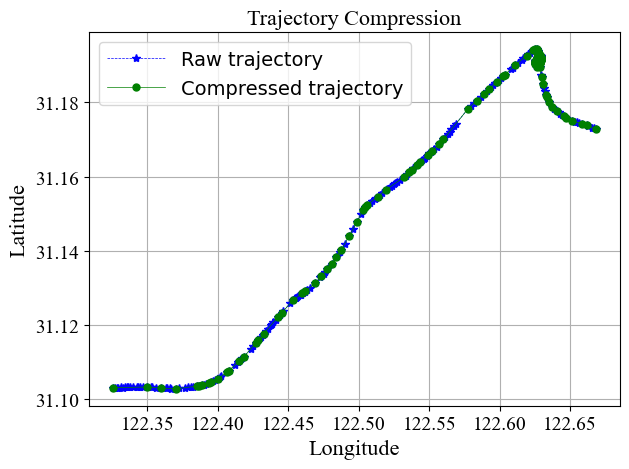

In [191]:
import traj_compress
from traj_compress import douglaspeucker

def dptest():
    data = pd.read_csv('1.csv', usecols=['DRMMSI', 'DRGPSTIME', 'DRLONGITUDE', 'DRLATITUDE'])
    grouped = data[:].groupby('DRMMSI')
    for name, group in grouped:
        trajdata = group.sort_values(by='DRGPSTIME', ascending=True)
        dp = douglaspeucker(trajdata[['DRLATITUDE', 'DRLONGITUDE']].values)
        epsilon = dp.avg()
        mask = dp.rdp(group[['DRLATITUDE', 'DRLONGITUDE']].values, epsilon, algo="iter", return_mask=True)
        compresseddata = group[mask]
        plt.plot(trajdata['DRLONGITUDE'], trajdata['DRLATITUDE'], marker='*', linestyle='--', color='blue',
                 linewidth=0.5,
                 label='Raw trajectory')
        plt.plot(compresseddata['DRLONGITUDE'], compresseddata['DRLATITUDE'], marker='o', ms=5, linestyle='-',
                 color='g',
                 linewidth=0.5, label='Compressed trajectory')
        plt.yticks(fontproperties='Times New Roman', size=14)
        plt.xticks(fontproperties='Times New Roman', size=14)
        plt.xlabel('Longitude', fontdict={'family': 'Times New Roman', 'size': 16})
        plt.ylabel('Latitude', fontdict={'family': 'Times New Roman', 'size': 16})
        plt.title('Trajectory Compression', fontdict={'family': 'Times New Roman', 'size': 16})
        plt.ticklabel_format(useOffset=False, style='plain')
        plt.grid()
        plt.legend()
        plt.tight_layout()
        plt.show()


if __name__ == '__main__':
    dptest()
   



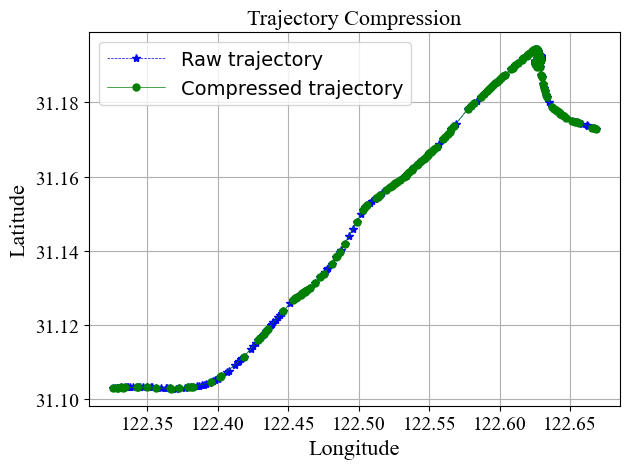

In [192]:
def sbctest():
    trajdata = pd.read_csv('1.csv', encoding="gbk")
    compresseddata = traj_compress.sbc(trajdata, 0.025, 0.25)
    plt.plot(trajdata['DRLONGITUDE'], trajdata['DRLATITUDE'], marker='*', linestyle='--', color='blue', linewidth=0.5,
             label='Raw trajectory')
    plt.plot(compresseddata['DRLONGITUDE'], compresseddata['DRLATITUDE'], marker='o', ms=5, linestyle='-', color='g',
             linewidth=0.5, label='Compressed trajectory')
    plt.yticks(fontproperties='Times New Roman', size=14)
    plt.xticks(fontproperties='Times New Roman', size=14)
    plt.xlabel('Longitude', fontdict={'family': 'Times New Roman', 'size': 16})
    plt.ylabel('Latitude', fontdict={'family': 'Times New Roman', 'size': 16})
    plt.title('Trajectory Compression', fontdict={'family': 'Times New Roman', 'size': 16})
    plt.ticklabel_format(useOffset=False, style='plain')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()
if __name__ == '__main__':
    sbctest()
   

# 2 Trajectory data management


In [163]:
# Trajectory data management includes two aspects: trajectory query and trajectory similarity measurement.

## 2.1 Trajectory query

In [164]:
import chunk_read
# the param input: filename of the input file, the param output: filename of the output file, the param mmsi: MMSI of ship
chunk_read.read_ais_data_mmsi(input="1.csv",output='test.csv',mmsi='244726000')

   INDEX     DRMMSI  DRLATITUDE  DRLONGITUDE  DRDIRECTION  DRSPEED  \
0      0  244726000   31.172785   122.668333        278.6     12.9   
1      1  244726000   31.172983   122.667032        280.8     12.9   
2      2  244726000   31.173205   122.665447        279.3     12.9   
3      3  244726000   31.173597   122.662968        280.3     12.9   
4      4  244726000   31.173783   122.661732        280.4     13.0   

    DRGPSTIME  STATUS  DRTRUEHEADING  DIRECTION  
0  1556415580       0              0        0.0  
1  1556415599       0              0        2.2  
2  1556415623       0              0       -1.5  
3  1556415659       0              0        1.0  
4  1556415677       0              0        0.1  
Iteration is stopped.
Finished.


# 3 Trajectory mining

## 3.1 Trajectory clustering

## 3.2 Calculation of ship anchor berth area

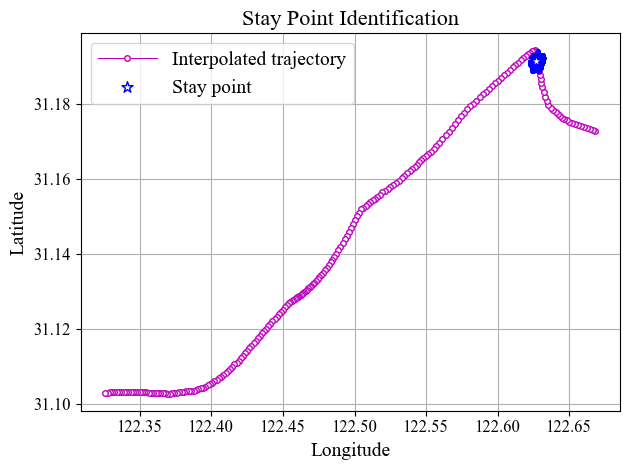

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
122°37.637′E
31°11.477′N


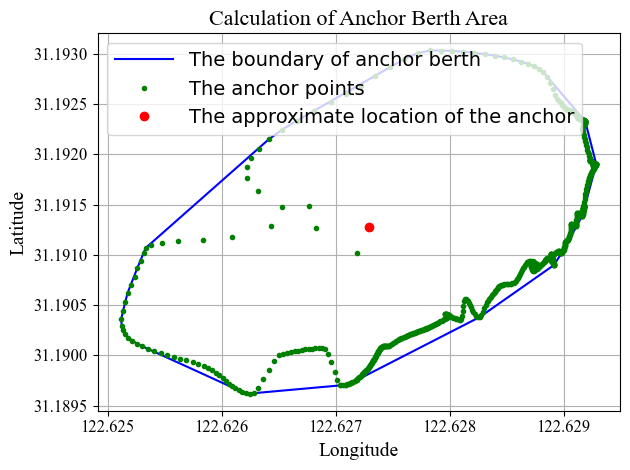

113313.88677552342
113313.88677552342


In [167]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geotostr
import traj_stay


# Function to know if we have a CCW turn
def CCW(p1, p2, p3):
    if (p3[1] - p1[1]) * (p2[0] - p1[0]) >= (p2[1] - p1[1]) * (p3[0] - p1[0]):
        return True
    return False


def GiftWrapping(S):
    '''
    outline of polygon
    :param S: collection of points
    :return: outline of polygon
    '''
    print(plt.style.available)  # 查看可用风格
    index = 0
    n = len(S)
    P = [None] * n
    l = np.where(S[:, 0] == np.min(S[:, 0]))
    pointOnHull = S[l[0][0]]
    i = 0
    while True:
        P[i] = pointOnHull
        endpoint = S[0]
        for j in range(1, n):
            if (endpoint[0] == pointOnHull[0] and endpoint[1] == pointOnHull[1]) or not CCW(S[j], P[i], endpoint):
                endpoint = S[j]
        i = i + 1
        pointOnHull = endpoint
        index += 1
        if endpoint[0] == P[0][0] and endpoint[1] == P[0][1]:
            break
    for i in range(n):
        if P[-1] is None:
            del P[-1]
    P = np.array(P)
    # Plot final hull
    centriod = polygoncenterofmass(P.tolist())
    print(geotostr.longgeotostr(centriod[0]))
    print(geotostr.latgeotostr(centriod[1]))
    plt.clf()
    plt.plot(P[:, 0], P[:, 1], 'b-', picker=5)
    plt.plot([P[-1, 0], P[0, 0]], [P[-1, 1], P[0, 1]], 'b-', picker=5, label='The boundary of anchor berth')
    plt.plot(S[:, 0], S[:, 1], ".g", label='The anchor points')
    plt.plot(centriod[0], centriod[1], "or", label='The approximate location of the anchor')
    plt.yticks(fontproperties='Times New Roman', size=12)
    plt.xticks(fontproperties='Times New Roman', size=12)
    plt.xlabel('Longitude', fontdict={'family': 'Times New Roman', 'size': 14})
    plt.ylabel('Latitude', fontdict={'family': 'Times New Roman', 'size': 14})
    plt.title('Calculation of Anchor Berth Area', fontdict={'family': 'Times New Roman', 'size': 16})
    plt.ticklabel_format(useOffset=False, style='plain')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show(block=True)
    plt.pause(1)
    return P


def shoelace(list):
    '''
    shoelace formula, calculate area
    :param list: input in clockwise direction
    :return: area of polygon
    '''
    list.append(list[0])
    n = len(list)
    t1 = 0.0
    t2 = 0.0
    for i in range(n - 1):
        t1 += (list[i][0] * list[i + 1][1]) * 3600  # 平方海里，′
        t2 += (list[i][1] * list[i + 1][0]) * 3600
    s = abs(t1 - t2) * 0.5 * 1852.25 * 1852.25
    print(str(s))
    return s


def polygonarea(pointLists):
    area = 0.0
    for i in range(len(pointLists)):
        j = (i + 1) % len(pointLists)
        area += pointLists[i][1] * pointLists[j][0]
        area -= pointLists[i][0] * pointLists[j][1]
    area /= 2.0
    return (abs(area))


def polygoncenterofmass(pointLists):
    '''
    centroid of polygon
    :param pointLists: boundary points
    :return: centroid of polygon
    '''
    if len(pointLists) < 3:
        return (0, 0)
    else:
        cx = 0
        cy = 0
        factor = 0
        j = 0
        a = polygonarea(pointLists)
        for i in range(len(pointLists)):
            j = (i + 1) % len(pointLists)
            factor = pointLists[i][1] * pointLists[j][0] - pointLists[j][1] * pointLists[i][0]
            cx += (pointLists[i][1] + pointLists[j][1]) * factor
            cy += (pointLists[i][0] + pointLists[j][0]) * factor
        factor = 1.0 / (6.0 * a)
        cx = cx * factor
        cy = cy * factor
        return [abs(cy), abs(cx)]


def main():
    font_legend = {
        'family': 'Times New Roman',
        'weight': 'normal',
        'size': 14
    }
    trajdata = traj_stay.stay_st_detect('1.csv')
    scatterColors = ['blue', 'red', 'yellow', 'cyan', 'purple', 'orange', 'olive', 'brown', 'black', 'm']
    for shipmmsi, dt in trajdata.groupby('DRMMSI'):
        labels = dt['SP_Status'].values
        lbs = set(labels)
        plt.plot(dt['DRLONGITUDE'].values, dt['DRLATITUDE'].values, marker='o',
                 markeredgewidth=1.0, linewidth=0.75, label='Interpolated trajectory',
                 markerfacecolor='white', markeredgecolor='m', ms=4, alpha=1.0, color='m', zorder=2)
        for i, item in enumerate(lbs):
            if item >= 0:
                colorSytle = scatterColors[i % len(scatterColors)]
                subCluster = dt.query("SP_Status==@item")
                plt.scatter(subCluster['DRLONGITUDE'].values, subCluster['DRLATITUDE'].values, marker='*', s=70,
                            edgecolors=colorSytle, label='Stay point',
                            c='white', linewidths=1.0, zorder=3)
                plt.title('Stay Point Identification', fontdict={'family': 'Times New Roman', 'size': 16})
                plt.yticks(fontproperties='Times New Roman', size=12)
                plt.xticks(fontproperties='Times New Roman', size=12)
                plt.xlabel('Longitude', fontdict={'family': 'Times New Roman', 'size': 14})
                plt.ylabel('Latitude', fontdict={'family': 'Times New Roman', 'size': 14})
                plt.ticklabel_format(useOffset=False, style='plain')
                plt.legend(loc="best", prop=font_legend)
                plt.grid(True)
                plt.tight_layout()
                plt.show()

                subCluster.rename(columns={'DRLATITUDE': 'latitude', 'DRLONGITUDE': 'longitude'},
                                  inplace=True)
                points = []
                for idx, data in subCluster.iterrows():
                    p = [data['longitude'], data['latitude']]
                    points.append(p)
                P = np.array(points)
                L = GiftWrapping(P)
                mj = shoelace(L.tolist())
                print(str(mj))
            else:
                continue


if __name__ == '__main__':
    main()


#  Trajectory visualization

## 4.1 Multi-ship trajectory display

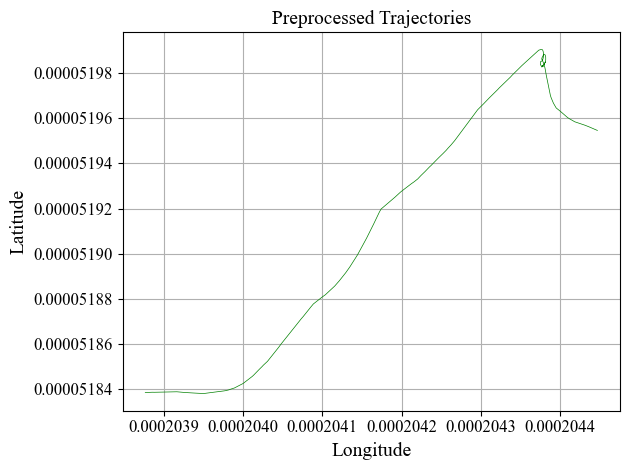

In [169]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def load_data(file_path):
    """
    import trajectory data
    :return: trajectory data
    """
    data = pd.read_csv(file_path, usecols=['DRGPSTIME', 'DRMMSI', 'DRLATITUDE', 'DRLONGITUDE'])
    data.rename(columns={'DRLONGITUDE': 'long', 'DRLATITUDE': 'lat', 'DRGPSTIME': 't', 'DRMMSI': 'mmsi'}, inplace=True)
    data['long'] = data['long'].map(lambda x: x / 600000.0)
    data['lat'] = data['lat'].map(lambda x: x / 600000.0)
    return data


if __name__ == '__main__':
    trajectories = load_data('1.csv')
    params = {'axes.titlesize': 'large',
              'legend.fontsize': 14,
              'legend.handlelength': 3}
    plt.rcParams.update(params)

    for shipmmsi, dt in trajectories.groupby('mmsi'):
        plt.plot(dt['long'].values, dt['lat'].values, color='green', linewidth=0.5)

    plt.yticks(fontproperties='Times New Roman', size=12)
    plt.xticks(fontproperties='Times New Roman', size=12)
    plt.xlabel('Longitude', fontdict={'family': 'Times New Roman', 'size': 14})
    plt.ylabel('Latitude', fontdict={'family': 'Times New Roman', 'size': 14})
    plt.title('Preprocessed Trajectories', fontdict={'family': 'Times New Roman', 'size': 14})
    plt.ticklabel_format(useOffset=False, style='plain')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
